In [1]:
# Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import sklearn
from sklearn.neighbors import KernelDensity
from sklearn.metrics import mean_squared_error,accuracy_score

# 4(a)

In [2]:
df = pd.read_csv('day.csv')
df_2012 = df[df['yr']==1]

In [3]:
df_2012

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
365,366,2012-01-01,1,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,686,1608,2294
366,367,2012-01-02,1,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,244,1707,1951
367,368,2012-01-03,1,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,89,2147,2236
368,369,2012-01-04,1,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,95,2273,2368
369,370,2012-01-05,1,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,140,3132,3272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
def find_outliers(x):
    Q1=np.percentile(x,25)
    Q3=np.percentile(x,75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    outlier_ind=list(x.index[(x<lower)|(x>upper)])
    outlier_value=list(x[outlier_ind])
    return outlier_ind,outlier_value

find_outliers(df_2012['temp'])[0]
df_2012=df_2012.drop(find_outliers(df_2012['temp'])[0],axis=0)

find_outliers(df_2012['atemp'])[0]
df_2012=df_2012.drop(find_outliers(df_2012['temp'])[0],axis=0)

find_outliers(df_2012['hum'])[0]
df_2012=df_2012.drop(find_outliers(df_2012['temp'])[0],axis=0)

find_outliers(df_2012['windspeed'])[0]
df_2012=df_2012.drop(find_outliers(df_2012['temp'])[0],axis=0)

find_outliers(df_2012['casual'])[0]
df_2012=df_2012.drop(find_outliers(df_2012['temp'])[0],axis=0)

find_outliers(df_2012['registered'])[0]
df_2012=df_2012.drop(find_outliers(df_2012['temp'])[0],axis=0)


In [5]:
df_2012.shape

(366, 16)

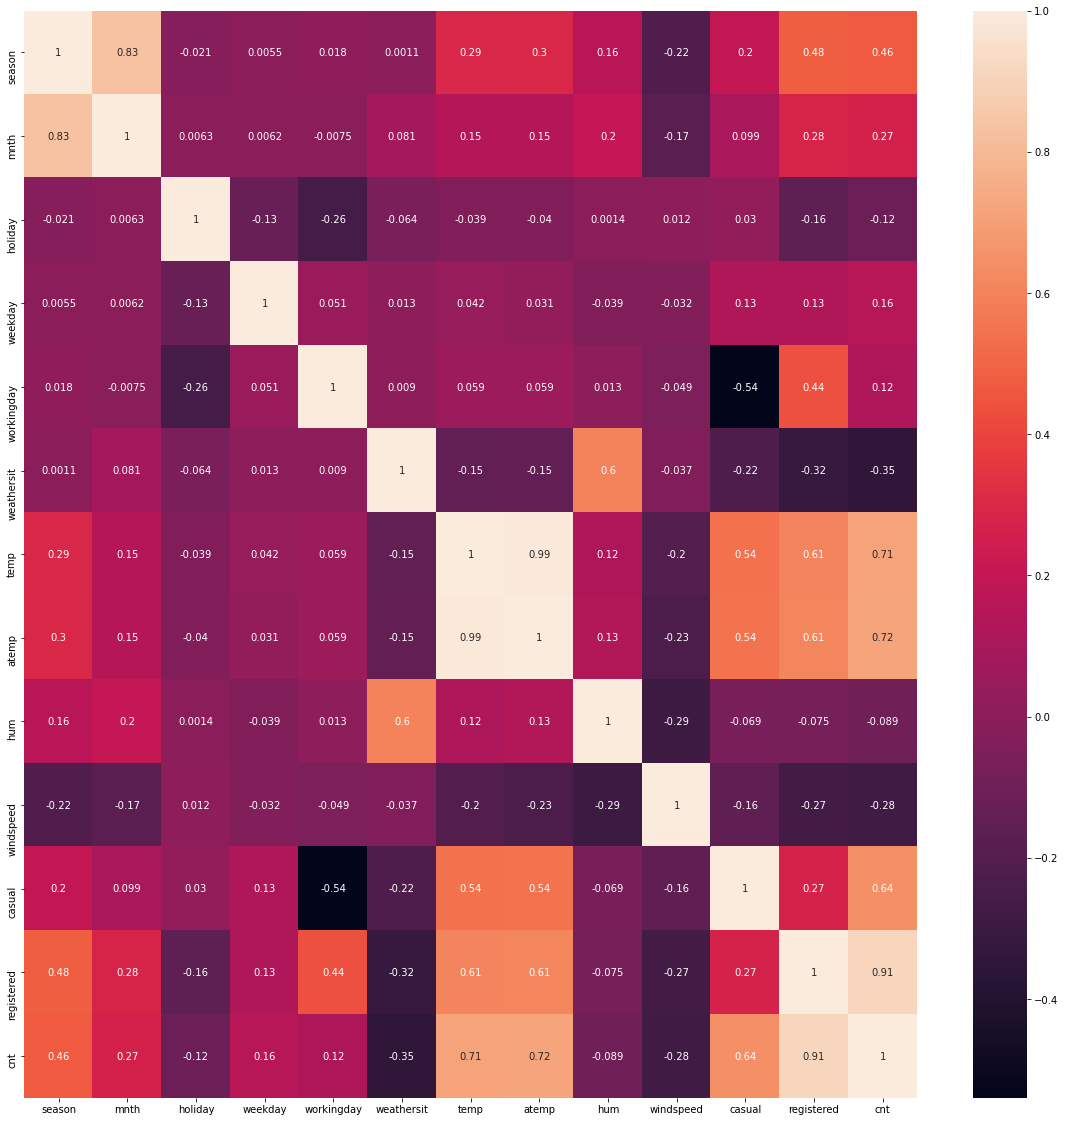

In [6]:
import seaborn as sns
corr_data =df_2012.iloc[:,[2,4,5,6,7,8,9,10,11,12,13,14,15]]

cor_mat=corr_data.corr()

fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(cor_mat,annot = True)

plt.show()

In [7]:
df_2012_feat_pre=df_2012[['season','holiday','workingday', 'weekday','weathersit','temp','hum','windspeed','casual','registered','cnt']]

X=df_2012_feat_pre.iloc[:,:-1]

y=df_2012_feat_pre.iloc[:,-1]


In [8]:
X_mod = pd.get_dummies(X, columns=['weathersit'])

X_mod = pd.get_dummies(X_mod, columns=['season'])

X_mod = pd.get_dummies(X_mod, columns=['weekday'])





In [9]:
X_mod.columns

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'weathersit_1', 'weathersit_2', 'weathersit_3',
       'season_1', 'season_2', 'season_3', 'season_4', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6'],
      dtype='object')

In [10]:
#splitting into fit and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mod, y, test_size = 0.3, random_state = 0)


In [11]:
from sklearn.tree import DecisionTreeRegressor
from math import sqrt

In [12]:
Training_RMSE_dt=[]
Testing_RMSE_dt=[]
for d in range(1,32,2):
    print("Maximum depth of tree:",d)
    
    dt = DecisionTreeRegressor(max_depth = d)
    dt.fit(X_train,y_train)
     
    y_training_pred_dt = dt.predict(X_train)
    
   #training
    error_train_dt = sqrt(mean_squared_error(y_train,y_training_pred_dt))
    print("training RMSE for dt regression:",error_train_dt)
    Training_RMSE_dt.append(error_train_dt)
     
    y_test_pred_dt = dt.predict(X_test)
    #testing 
    error_test_dt = sqrt(mean_squared_error(y_test,y_test_pred_dt))
    print("testing RMSE for dt regression:",error_test_dt)
    Testing_RMSE_dt.append(error_test_dt)
    print("")

Maximum depth of tree: 1
training RMSE for dt regression: 1103.3551426724532
testing RMSE for dt regression: 1122.5165179245712

Maximum depth of tree: 3
training RMSE for dt regression: 558.838642554052
testing RMSE for dt regression: 606.187557024429

Maximum depth of tree: 5
training RMSE for dt regression: 221.30695443363277
testing RMSE for dt regression: 351.4738470852065

Maximum depth of tree: 7
training RMSE for dt regression: 77.49393999524803
testing RMSE for dt regression: 295.18273595665545

Maximum depth of tree: 9
training RMSE for dt regression: 23.449660337422294
testing RMSE for dt regression: 287.6949441812313

Maximum depth of tree: 11
training RMSE for dt regression: 7.289259275211028
testing RMSE for dt regression: 270.2244563657809

Maximum depth of tree: 13
training RMSE for dt regression: 1.333780849377688
testing RMSE for dt regression: 269.7112631448151

Maximum depth of tree: 15
training RMSE for dt regression: 0.1767766952966369
testing RMSE for dt regressi

In [13]:
from matplotlib import rcParams

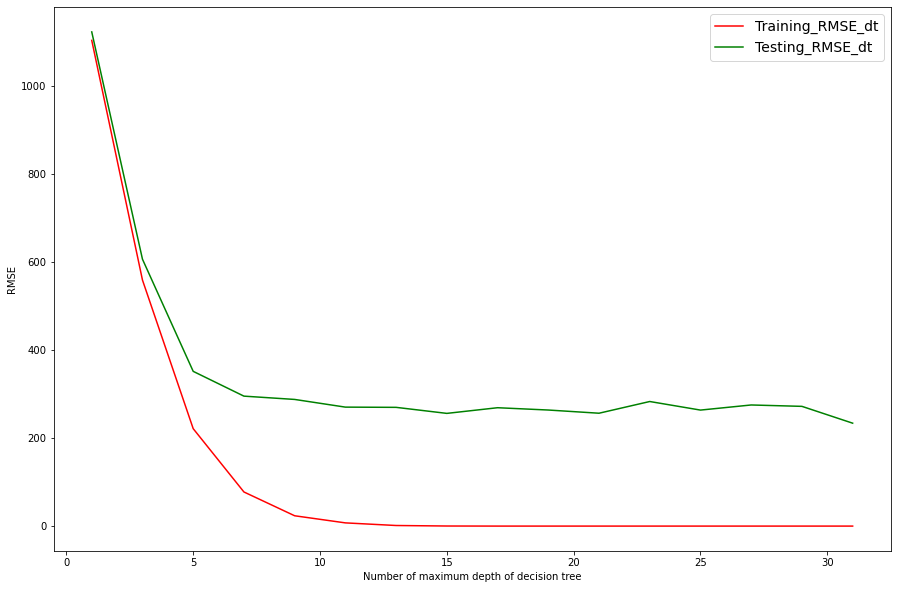

In [14]:
no_max_depth=range(1,32,2)
Training_RMSE_dt=np.array(Training_RMSE_dt) 
Testing_RMSE_dt=np.array(Testing_RMSE_dt) 
plt.figure(figsize=(15,10))
TA_inter,=plt.plot(no_max_depth,Training_RMSE_dt,label="Training_RMSE_knn",color="red")
VA_inter,=plt.plot(no_max_depth,Testing_RMSE_dt,label="Testing_RMSE_knn",color="green")
plt.legend([TA_inter,VA_inter],['Training_RMSE_dt','Testing_RMSE_dt'],fontsize=14)
plt.xlabel("Number of maximum depth of decision tree")
plt.ylabel("RMSE")
rcParams['font.family'] = 'Times New Roman'
rcParams.update({'font.size': 14})
plt.show()

In [15]:
# Find out the parametr to address overfitting
min_sample_split=[]
max_leaf_nodes=[]
Training_RMSE_dt=[]
Testing_RMSE_dt=[]
Train_minus_test_RMSE=[]
for s in range(2,40,2):
    for l in range(100,2000,200):
        print("Minimum sapmle for split:",s)
        min_sample_split.append(s)
        print("Maximum number of leaf in end modes:",l)
        max_leaf_nodes.append(l)

        dt = DecisionTreeRegressor(max_depth = 25, min_samples_split=s,max_leaf_nodes=l)
        dt.fit(X_train,y_train)

        y_training_pred_dt = dt.predict(X_train)

        #training
        error_train_dt = sqrt(mean_squared_error(y_train,y_training_pred_dt))
        print("training RMSE for dt regression:",error_train_dt)
        Training_RMSE_dt.append(error_train_dt)

        y_test_pred_dt = dt.predict(X_test)
        #testing 
        error_test_dt = sqrt(mean_squared_error(y_test,y_test_pred_dt))
        print("testing RMSE for dt regression:",error_test_dt)
        Testing_RMSE_dt.append(error_test_dt)

        #diff
        y_error_train_min_test=error_train_dt-error_test_dt
        Train_minus_test_RMSE.append(y_error_train_min_test)
        print("Train_minus_test_RMSE",y_error_train_min_test)
        print("")

Minimum sapmle for split: 2
Maximum number of leaf in end modes: 100
training RMSE for dt regression: 44.863458731081764
testing RMSE for dt regression: 280.3212856036663
Train_minus_test_RMSE -235.45782687258452

Minimum sapmle for split: 2
Maximum number of leaf in end modes: 300
training RMSE for dt regression: 0.0
testing RMSE for dt regression: 264.7323691442497
Train_minus_test_RMSE -264.7323691442497

Minimum sapmle for split: 2
Maximum number of leaf in end modes: 500
training RMSE for dt regression: 0.0
testing RMSE for dt regression: 261.16859758331657
Train_minus_test_RMSE -261.16859758331657

Minimum sapmle for split: 2
Maximum number of leaf in end modes: 700
training RMSE for dt regression: 0.0
testing RMSE for dt regression: 282.2617901555543
Train_minus_test_RMSE -282.2617901555543

Minimum sapmle for split: 2
Maximum number of leaf in end modes: 900
training RMSE for dt regression: 0.0
testing RMSE for dt regression: 254.61835968937726
Train_minus_test_RMSE -254.618359

testing RMSE for dt regression: 344.90614817966184
Train_minus_test_RMSE -109.25646050594722

Minimum sapmle for split: 12
Maximum number of leaf in end modes: 500
training RMSE for dt regression: 235.64968767371462
testing RMSE for dt regression: 344.90614817966184
Train_minus_test_RMSE -109.25646050594722

Minimum sapmle for split: 12
Maximum number of leaf in end modes: 700
training RMSE for dt regression: 235.64968767371462
testing RMSE for dt regression: 344.90614817966184
Train_minus_test_RMSE -109.25646050594722

Minimum sapmle for split: 12
Maximum number of leaf in end modes: 900
training RMSE for dt regression: 235.64968767371462
testing RMSE for dt regression: 344.90614817966184
Train_minus_test_RMSE -109.25646050594722

Minimum sapmle for split: 12
Maximum number of leaf in end modes: 1100
training RMSE for dt regression: 235.64968767371462
testing RMSE for dt regression: 344.90614817966184
Train_minus_test_RMSE -109.25646050594722

Minimum sapmle for split: 12
Maximum numb

testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -95.20324665978654

Minimum sapmle for split: 24
Maximum number of leaf in end modes: 300
training RMSE for dt regression: 332.88350795042703
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -95.20324665978654

Minimum sapmle for split: 24
Maximum number of leaf in end modes: 500
training RMSE for dt regression: 332.88350795042703
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -95.20324665978654

Minimum sapmle for split: 24
Maximum number of leaf in end modes: 700
training RMSE for dt regression: 332.88350795042703
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -95.20324665978654

Minimum sapmle for split: 24
Maximum number of leaf in end modes: 900
training RMSE for dt regression: 332.88350795042703
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -95.20324665978654

Minimum sapmle for split: 24
Maximum number of leaf 

training RMSE for dt regression: 430.14403607282964
testing RMSE for dt regression: 540.6453143809058
Train_minus_test_RMSE -110.50127830807617

Minimum sapmle for split: 36
Maximum number of leaf in end modes: 100
training RMSE for dt regression: 475.75886960764586
testing RMSE for dt regression: 569.2720497712642
Train_minus_test_RMSE -93.5131801636183

Minimum sapmle for split: 36
Maximum number of leaf in end modes: 300
training RMSE for dt regression: 475.75886960764586
testing RMSE for dt regression: 569.2720497712642
Train_minus_test_RMSE -93.5131801636183

Minimum sapmle for split: 36
Maximum number of leaf in end modes: 500
training RMSE for dt regression: 475.75886960764586
testing RMSE for dt regression: 569.2720497712642
Train_minus_test_RMSE -93.5131801636183

Minimum sapmle for split: 36
Maximum number of leaf in end modes: 700
training RMSE for dt regression: 475.75886960764586
testing RMSE for dt regression: 569.2720497712642
Train_minus_test_RMSE -93.5131801636183

Min

In [16]:
#pivot table showing the progress of overfitting reduction

In [17]:
comb_prmeter_df=pd.DataFrame(list(zip(min_sample_split, max_leaf_nodes,Train_minus_test_RMSE)), 
               columns =['min_sample_split', 'max_leaf_nodes','Train_minus_test_RMSE'])




In [18]:
comb_prmeter_df

,min_sample_split,max_leaf_nodes,Train_minus_test_RMSE
0,2,100,-235.457827
1,2,300,-264.732369
2,2,500,-261.168598
3,2,700,-282.261790
4,2,900,-254.618360
...,...,...,...
185,38,1100,-93.513180
186,38,1300,-93.513180
187,38,1500,-93.513180
188,38,1700,-93.513180


In [19]:
pivot_comb_prmeter_df=pd.pivot_table(comb_prmeter_df, 
               index=['min_sample_split'],columns=['max_leaf_nodes'],
                      values=['Train_minus_test_RMSE'])

In [20]:
pivot_comb_prmeter_df

Train_minus_test_RMSE                                      \
max_leaf_nodes                    100         300         500         700    
min_sample_split                                                             
2                          -235.457827 -264.732369 -261.168598 -282.261790   
4                          -202.089464 -223.965566 -232.491742 -227.225438   
6                          -177.893643 -177.971489 -185.144718 -152.850584   
8                          -148.200446 -169.510703 -146.008777 -168.114170   
10                         -143.329874 -138.321903 -147.323503 -146.034045   
12                         -109.256461 -109.256461 -109.256461 -109.256461   
14                         -105.595624 -105.595624 -105.595624 -105.595624   
16                         -102.694666 -102.694666 -102.694666 -102.694666   
18                         -102.318458 -102.318458 -102.318458 -102.318458   
20                         -102.318458 -102.318458 -102.318458 -102.318458   
22                         -107.850812 -107.850812 -107.850812 -107.850812   
24                          -95.203247  -95.203247  -95.203247  -95.203247   
26                          -95.203247  -95.203247  -95.203247  -95.203247   
28                          -95.203247  -95.203247  -95.203247  -95.203247   
30                         -114.599297 -114.599297 -114.599297 -114.599297   
32                         -110.501278 -110.501278 -110.501278 -110.501278   
34                         -110.501278 -110.501278 -110.501278 -110.501278   
36                          -93.513180  -93.513180  -93.513180  -93.513180   
38                          -93.513180  -93.513180  -93.513180  -93.513180   

                                                                              \
max_leaf_nodes          900         1100        1300        1500        1700   
min_sample_split                                                               
2                -254.618360 -260.737782 -274.466375 -257.776312 -269.007063   
4                -232.240578 -223.784325 -209.881585 -220.232448 -194.121888   
6                -184.818073 -185.208167 -171.593515 -164.104860 -179.049442   
8                -151.443284 -151.145574 -141.814821 -140.159254 -140.159254   
10               -136.997465 -138.321903 -138.321903 -144.629605 -138.321903   
12               -109.256461 -109.256461 -109.256461 -109.256461 -109.256461   
14               -105.595624 -105.595624 -105.595624 -105.595624 -105.595624   
16               -102.694666 -102.694666 -102.694666 -102.694666 -102.694666   
18               -102.318458 -102.318458 -102.318458 -102.318458 -102.318458   
20               -102.318458 -102.318458 -102.318458 -102.318458 -102.318458   
22               -107.850812 -107.850812 -107.850812 -107.850812 -107.850812   
24                -95.203247  -95.203247  -95.203247  -95.203247  -95.203247   
26                -95.203247  -95.203247  -95.203247  -95.203247  -95.203247   
28                -95.203247  -95.203247  -95.203247  -95.203247  -95.203247   
30               -114.599297 -114.599297 -114.599297 -114.599297 -114.599297   
32               -110.501278 -110.501278 -110.501278 -110.501278 -110.501278   
34               -110.501278 -110.501278 -110.501278 -110.501278 -110.501278   
36                -93.513180  -93.513180  -93.513180  -93.513180  -93.513180   
38                -93.513180  -93.513180  -93.513180  -93.513180  -93.513180   

                              
max_leaf_nodes          1900  
min_sample_split              
2                -301.704898  
4                -237.769449  
6                -161.879633  
8                -161.180747  
10               -136.997465  
12               -109.256461  
14               -105.595624  
16               -102.694666  
18               -102.318458  
20               -102.318458  
22               -107.850812  
24                -95.203247  
26                -95.203247  
28                -95.203247  
30          

In [21]:
#A new pivot table showing the test RMSE 

In [22]:
comb_prmeter_df_test_RMSE=pd.DataFrame(list(zip(min_sample_split, max_leaf_nodes,Testing_RMSE_dt)), 
               columns =['min_sample_split', 'max_leaf_nodes','Test_RMSE'])



pivot_comb_prmeter_df_test_RMSE=pd.pivot_table(comb_prmeter_df_test_RMSE, 
               index=['min_sample_split'],columns=['max_leaf_nodes'],
                      values=['Test_RMSE'])

In [23]:
pivot_comb_prmeter_df_test_RMSE

Test_RMSE                                                  \
max_leaf_nodes          100         300         500         700         900    
min_sample_split                                                               
2                 280.321286  264.732369  261.168598  282.261790  254.618360   
4                 252.298934  269.946377  278.472553  273.206249  278.221389   
6                 288.545673  288.623519  295.796748  263.502615  295.470104   
8                 278.055024  299.365281  275.863355  297.968748  281.297862   
10                338.143256  333.135285  342.136885  340.847426  331.810847   
12                344.906148  344.906148  344.906148  344.906148  344.906148   
14                349.842667  349.842667  349.842667  349.842667  349.842667   
16                350.268172  350.268172  350.268172  350.268172  350.268172   
18                364.663756  364.663756  364.663756  364.663756  364.663756   
20                364.663756  364.663756  364.663756  364.663756  364.663756   
22                422.930420  422.930420  422.930420  422.930420  422.930420   
24                428.086755  428.086755  428.086755  428.086755  428.086755   
26                428.086755  428.086755  428.086755  428.086755  428.086755   
28                428.086755  428.086755  428.086755  428.086755  428.086755   
30                506.154306  506.154306  506.154306  506.154306  506.154306   
32                540.645314  540.645314  540.645314  540.645314  540.645314   
34                540.645314  540.645314  540.645314  540.645314  540.645314   
36                569.272050  569.272050  569.272050  569.272050  569.272050   
38                569.272050  569.272050  569.272050  569.272050  569.272050   

                                                                              
max_leaf_nodes          1100        1300        1500        1700        1900  
min_sample_split                                                              
2                 260.737782  274.466375  257.776312  269.007063  301.704898  
4                 269.765137  255.862396  266.213260  240.102700  283.750261  
6                 295.860198  282.245545  274.756891  289.701473  272.531664  
8                 281.000151  271.669399  270.013832  270.013832  291.035325  
10                333.135285  333.135285  339.442987  333.135285  331.810847  
12                344.906148  344.906148  344.906148  344.906148  344.906148  
14                349.842667  349.842667  349.842667  349.842667  349.842667  
16                350.268172  350.268172  350.268172  350.268172  350.268172  
18                364.663756  364.663756  364.663756  364.663756  364.663756  
20                364.663756  364.663756  364.663756  364.663756  364.663756  
22                422.930420  422.930420  422.930420  422.930420  422.930420  
24                428.086755  428.086755  428.086755  428.086755  428.086755  
26                428.086755  428.086755  428.086755  428.086755  428.086755  
28                428.086755  428.086755  428.086755  428.086755  428.086755  
30                506.154306  506.154306  506.154306  506.154306  506.154306  
32                540.645314  540.645314  540.645314  540.645314  540.645314  
34                540.645314  540.645314  540.645314  540.645314  540.645314  
36                569.272050  569.272050  569.272050  569.272050  569.272050  
38                569.272050  569.272050  569.272050  569.272050  569.272050

In [24]:
dt = DecisionTreeRegressor(max_depth = 25, min_samples_split=24,max_leaf_nodes=900)
dt.fit(X_train,y_train)

y_training_pred_dt = dt.predict(X_train)

#training
error_train_dt = sqrt(mean_squared_error(y_train,y_training_pred_dt))
print("training RMSE for dt regression:",error_train_dt)


y_test_pred_dt = dt.predict(X_test)
#testing 
error_test_dt = sqrt(mean_squared_error(y_test,y_test_pred_dt))
print("testing RMSE for dt regression:",error_test_dt)


training RMSE for dt regression: 332.88350795042703
testing RMSE for dt regression: 428.0867546102136


In [25]:
y_test

471    6370
624    7333
410    4169
391    3456
443    6153
       ... 
582    5464
510    6734
683    5495
599    7375
583    7013
Name: cnt, Length: 110, dtype: int64

In [26]:
from sklearn.tree import export_graphviz
export_graphviz(dt, out_file="tree.dot",feature_names=X_mod.columns,max_depth=25)



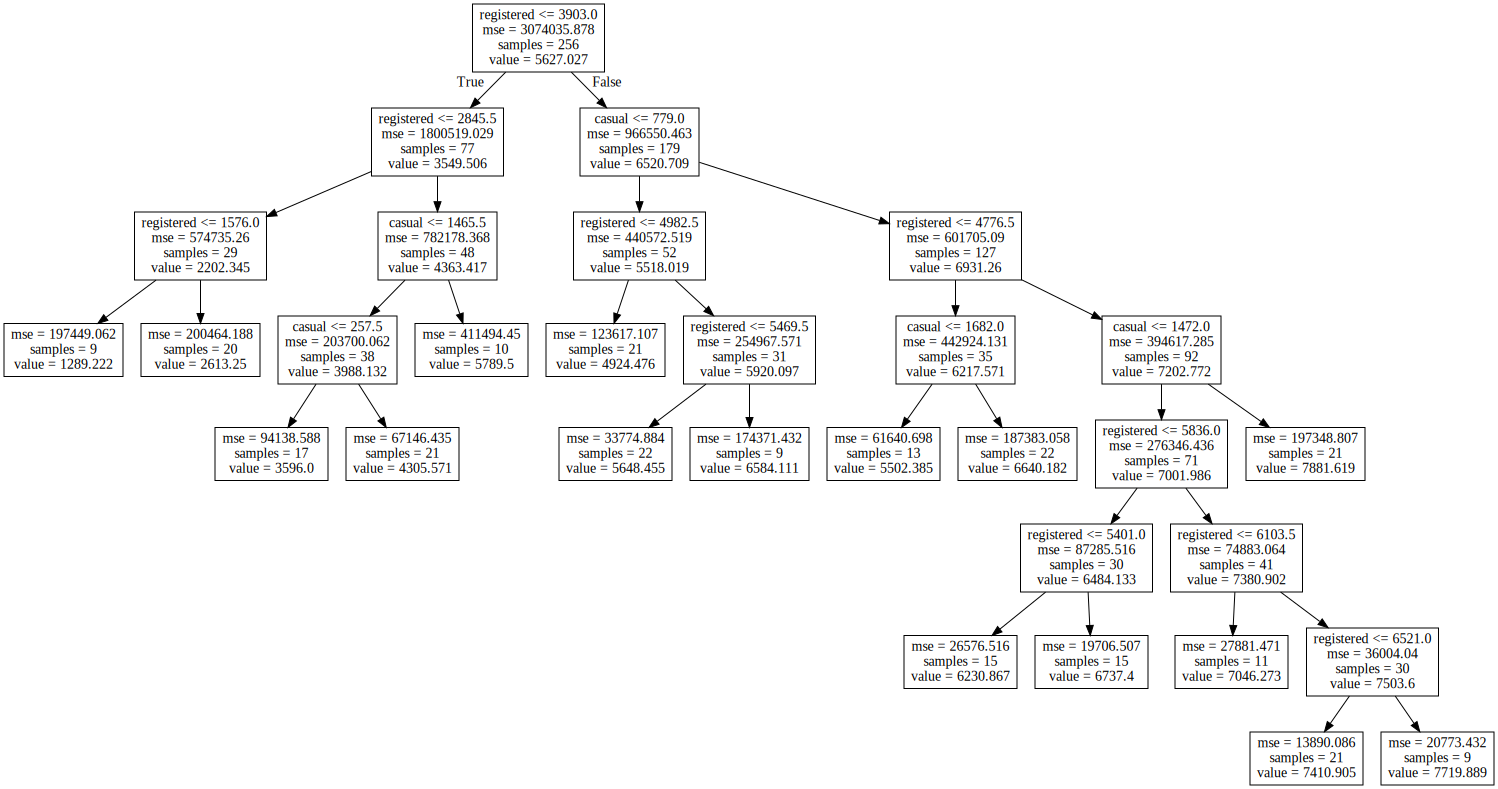

In [27]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
#display(graphviz.Source(dot_graph))
graph = graphviz.Source(dot_graph)  
graph


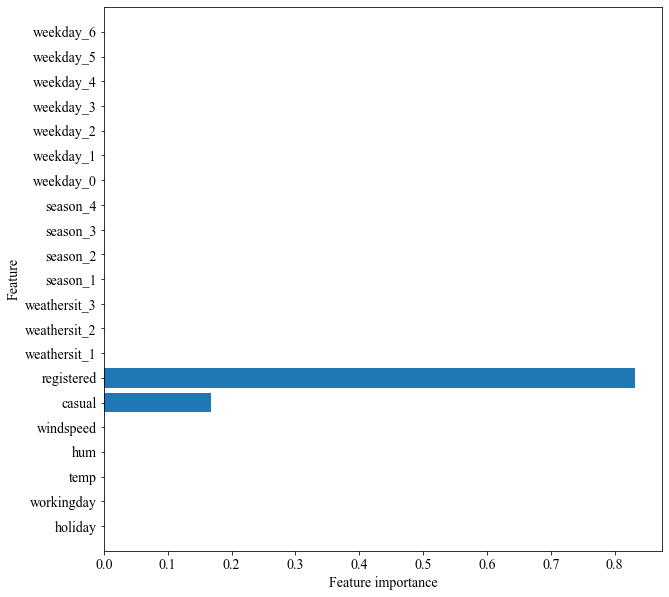

In [28]:

fig,ax=plt.subplots(figsize=(10,10))

def plot_feature_importances_dt(model):
    n_features = len(X_mod.columns)
    plt.barh(range(n_features), dt.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_mod.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_dt(dt.fit(X_train,y_train))

# 4(b)

# Random forest

In [29]:
from sklearn.ensemble import RandomForestRegressor
from numpy import arange
estimators_list=[]
Training_RMSE_rf=[]
Testing_RMSE_rf=[]
for estimator in range(1,202,10):
        estimators_list.append(estimator)
        print("number of estimator: ",estimator)
        rf=RandomForestRegressor(n_estimators=estimator,random_state=12)
        rf.fit(X_train,y_train)
        y_train_predicted_rf=rf.predict(X_train)
        y_test_predicted_rf=rf.predict(X_test)
        
        #training
        error_train_rf = sqrt(mean_squared_error(y_train,y_train_predicted_rf))
        print("Training RMSE for RF regression:",error_train_rf)
        Training_RMSE_rf.append(error_train_rf)

        
        #testing 
        error_test_rf = sqrt(mean_squared_error(y_test,y_test_predicted_rf))
        print("Testing RMSE for RF regression:",error_test_rf)
        Testing_RMSE_rf.append(error_test_rf)

number of estimator:  1
Training RMSE for RF regression: 202.7332664950427
Testing RMSE for RF regression: 347.47545367851654
number of estimator:  11
Training RMSE for RF regression: 90.02635364416841
Testing RMSE for RF regression: 215.37973785871822
number of estimator:  21
Training RMSE for RF regression: 80.5504107173733
Testing RMSE for RF regression: 202.44911798298412
number of estimator:  31
Training RMSE for RF regression: 80.06929020481877
Testing RMSE for RF regression: 196.10338472045177
number of estimator:  41
Training RMSE for RF regression: 79.17842909881024
Testing RMSE for RF regression: 197.7797291407561
number of estimator:  51
Training RMSE for RF regression: 78.40906798350258
Testing RMSE for RF regression: 196.54472653089667
number of estimator:  61
Training RMSE for RF regression: 76.85264158550036
Testing RMSE for RF regression: 194.78191834022044
number of estimator:  71
Training RMSE for RF regression: 76.84287732050618
Testing RMSE for RF regression: 189.77

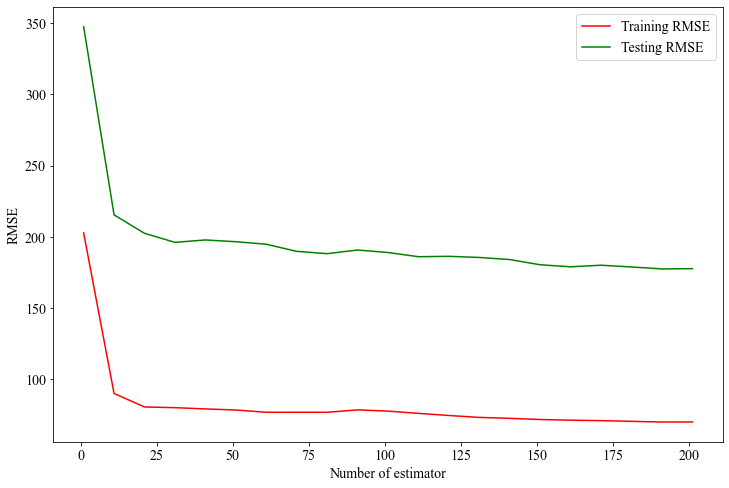

In [30]:
from matplotlib import rcParams
max_depth=range(1,202,10)
Training_RMSE_rf=np.array(Training_RMSE_rf)  
Testing_RMSE_rf=np.array(Testing_RMSE_rf) 
plt.figure(figsize=(12,8))
TA,=plt.plot(max_depth,Training_RMSE_rf,label="Training RMSE",color="red")
VA,=plt.plot(max_depth,Testing_RMSE_rf,label="Testing RMSE",color="green")
plt.legend([TA,VA],['Training RMSE','Testing RMSE'],fontsize=14)
plt.xlabel("Number of estimator")
plt.ylabel("RMSE")
rcParams['font.family'] = 'Times New Roman'
rcParams.update({'font.size': 14})
plt.show()


In [31]:
min_sample_split=[]
max_leaf_nodes=[]
max_depth=[]
Training_RMSE_rf=[]
Testing_RMSE_rf=[]
Train_minus_test_RMSE_rf=[]
for s in range(10,30,2):
    for l in range(100,1100,200):
        for d in range (10,30,2):
            print("Minimum sapmle for split:",s)
            min_sample_split.append(s)
            print("Maximum number of leaf in end modes:",l)
            max_leaf_nodes.append(l)
            print("Maximum depth:",d)
            max_depth.append(d)


            rf = RandomForestRegressor(n_estimators=191,random_state=12,
                                       max_depth = d, min_samples_split=s,max_leaf_nodes=l)
            rf.fit(X_train,y_train)

            y_training_pred_rf = rf.predict(X_train)

            #training
            error_train_rf = sqrt(mean_squared_error(y_train,y_training_pred_rf))
            print("training RMSE for dt regression:",error_train_rf)
            Training_RMSE_rf.append(error_train_rf)

            y_test_pred_rf = dt.predict(X_test)
            #testing 
            error_test_rf = sqrt(mean_squared_error(y_test,y_test_pred_rf))
            print("testing RMSE for dt regression:",error_test_rf)
            Testing_RMSE_rf.append(error_test_rf)

            #diff
            y_error_train_min_test_rf=error_train_rf-error_test_rf
            Train_minus_test_RMSE_rf.append(y_error_train_min_test_rf)
            print("Train_minus_test_RMSE",y_error_train_min_test_rf)
            print("")



Minimum sapmle for split: 10
Maximum number of leaf in end modes: 100
Maximum depth: 10
training RMSE for dt regression: 147.95274617015886
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -280.1340084400547

Minimum sapmle for split: 10
Maximum number of leaf in end modes: 100
Maximum depth: 12
training RMSE for dt regression: 147.90490885221368
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -280.1818457579999

Minimum sapmle for split: 10
Maximum number of leaf in end modes: 100
Maximum depth: 14
training RMSE for dt regression: 147.91225225485763
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -280.1745023553559

Minimum sapmle for split: 10
Maximum number of leaf in end modes: 100
Maximum depth: 16
training RMSE for dt regression: 147.91225225485763
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -280.1745023553559

Minimum sapmle for split: 10
Maximum number of leaf in end modes: 100
Ma

training RMSE for dt regression: 147.91225225485763
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -280.1745023553559

Minimum sapmle for split: 10
Maximum number of leaf in end modes: 700
Maximum depth: 22
training RMSE for dt regression: 147.91225225485763
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -280.1745023553559

Minimum sapmle for split: 10
Maximum number of leaf in end modes: 700
Maximum depth: 24
training RMSE for dt regression: 147.91225225485763
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -280.1745023553559

Minimum sapmle for split: 10
Maximum number of leaf in end modes: 700
Maximum depth: 26
training RMSE for dt regression: 147.91225225485763
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -280.1745023553559

Minimum sapmle for split: 10
Maximum number of leaf in end modes: 700
Maximum depth: 28
training RMSE for dt regression: 147.91225225485763
testing RMSE for dt 

training RMSE for dt regression: 163.75417251286729
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -264.3325820973463

Minimum sapmle for split: 12
Maximum number of leaf in end modes: 500
Maximum depth: 14
training RMSE for dt regression: 163.75417251286729
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -264.3325820973463

Minimum sapmle for split: 12
Maximum number of leaf in end modes: 500
Maximum depth: 16
training RMSE for dt regression: 163.75417251286729
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -264.3325820973463

Minimum sapmle for split: 12
Maximum number of leaf in end modes: 500
Maximum depth: 18
training RMSE for dt regression: 163.75417251286729
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -264.3325820973463

Minimum sapmle for split: 12
Maximum number of leaf in end modes: 500
Maximum depth: 20
training RMSE for dt regression: 163.75417251286729
testing RMSE for dt 

training RMSE for dt regression: 181.43185262988558
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -246.654901980328

Minimum sapmle for split: 14
Maximum number of leaf in end modes: 100
Maximum depth: 26
training RMSE for dt regression: 181.43185262988558
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -246.654901980328

Minimum sapmle for split: 14
Maximum number of leaf in end modes: 100
Maximum depth: 28
training RMSE for dt regression: 181.43185262988558
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -246.654901980328

Minimum sapmle for split: 14
Maximum number of leaf in end modes: 300
Maximum depth: 10
training RMSE for dt regression: 181.46465957362707
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -246.6220950365865

Minimum sapmle for split: 14
Maximum number of leaf in end modes: 300
Maximum depth: 12
training RMSE for dt regression: 181.43185262988558
testing RMSE for dt reg

training RMSE for dt regression: 181.43185262988558
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -246.654901980328

Minimum sapmle for split: 14
Maximum number of leaf in end modes: 900
Maximum depth: 18
training RMSE for dt regression: 181.43185262988558
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -246.654901980328

Minimum sapmle for split: 14
Maximum number of leaf in end modes: 900
Maximum depth: 20
training RMSE for dt regression: 181.43185262988558
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -246.654901980328

Minimum sapmle for split: 14
Maximum number of leaf in end modes: 900
Maximum depth: 22
training RMSE for dt regression: 181.43185262988558
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -246.654901980328

Minimum sapmle for split: 14
Maximum number of leaf in end modes: 900
Maximum depth: 24
training RMSE for dt regression: 181.43185262988558
testing RMSE for dt regr

training RMSE for dt regression: 199.91422772528048
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -228.1725268849331

Minimum sapmle for split: 16
Maximum number of leaf in end modes: 700
Maximum depth: 10
training RMSE for dt regression: 199.9458001158342
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -228.14095449437937

Minimum sapmle for split: 16
Maximum number of leaf in end modes: 700
Maximum depth: 12
training RMSE for dt regression: 199.91422772528048
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -228.1725268849331

Minimum sapmle for split: 16
Maximum number of leaf in end modes: 700
Maximum depth: 14
training RMSE for dt regression: 199.91422772528048
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -228.1725268849331

Minimum sapmle for split: 16
Maximum number of leaf in end modes: 700
Maximum depth: 16
training RMSE for dt regression: 199.91422772528048
testing RMSE for dt 

training RMSE for dt regression: 223.41755287762317
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -204.6692017325904

Minimum sapmle for split: 18
Maximum number of leaf in end modes: 300
Maximum depth: 22
training RMSE for dt regression: 223.41755287762317
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -204.6692017325904

Minimum sapmle for split: 18
Maximum number of leaf in end modes: 300
Maximum depth: 24
training RMSE for dt regression: 223.41755287762317
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -204.6692017325904

Minimum sapmle for split: 18
Maximum number of leaf in end modes: 300
Maximum depth: 26
training RMSE for dt regression: 223.41755287762317
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -204.6692017325904

Minimum sapmle for split: 18
Maximum number of leaf in end modes: 300
Maximum depth: 28
training RMSE for dt regression: 223.41755287762317
testing RMSE for dt 

training RMSE for dt regression: 249.36869672888918
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -178.7180578813244

Minimum sapmle for split: 20
Maximum number of leaf in end modes: 100
Maximum depth: 14
training RMSE for dt regression: 249.36869672888918
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -178.7180578813244

Minimum sapmle for split: 20
Maximum number of leaf in end modes: 100
Maximum depth: 16
training RMSE for dt regression: 249.36869672888918
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -178.7180578813244

Minimum sapmle for split: 20
Maximum number of leaf in end modes: 100
Maximum depth: 18
training RMSE for dt regression: 249.36869672888918
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -178.7180578813244

Minimum sapmle for split: 20
Maximum number of leaf in end modes: 100
Maximum depth: 20
training RMSE for dt regression: 249.36869672888918
testing RMSE for dt 

training RMSE for dt regression: 249.36869672888918
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -178.7180578813244

Minimum sapmle for split: 20
Maximum number of leaf in end modes: 700
Maximum depth: 26
training RMSE for dt regression: 249.36869672888918
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -178.7180578813244

Minimum sapmle for split: 20
Maximum number of leaf in end modes: 700
Maximum depth: 28
training RMSE for dt regression: 249.36869672888918
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -178.7180578813244

Minimum sapmle for split: 20
Maximum number of leaf in end modes: 900
Maximum depth: 10
training RMSE for dt regression: 249.3950220345971
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -178.69173257561647

Minimum sapmle for split: 20
Maximum number of leaf in end modes: 900
Maximum depth: 12
training RMSE for dt regression: 249.36869672888918
testing RMSE for dt 

training RMSE for dt regression: 268.6420343560042
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -159.44472025420936

Minimum sapmle for split: 22
Maximum number of leaf in end modes: 500
Maximum depth: 18
training RMSE for dt regression: 268.6420343560042
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -159.44472025420936

Minimum sapmle for split: 22
Maximum number of leaf in end modes: 500
Maximum depth: 20
training RMSE for dt regression: 268.6420343560042
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -159.44472025420936

Minimum sapmle for split: 22
Maximum number of leaf in end modes: 500
Maximum depth: 22
training RMSE for dt regression: 268.6420343560042
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -159.44472025420936

Minimum sapmle for split: 22
Maximum number of leaf in end modes: 500
Maximum depth: 24
training RMSE for dt regression: 268.6420343560042
testing RMSE for dt r

training RMSE for dt regression: 284.0210118319614
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -144.06574277825217

Minimum sapmle for split: 24
Maximum number of leaf in end modes: 300
Maximum depth: 10
training RMSE for dt regression: 284.0210118319614
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -144.06574277825217

Minimum sapmle for split: 24
Maximum number of leaf in end modes: 300
Maximum depth: 12
training RMSE for dt regression: 284.0210118319614
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -144.06574277825217

Minimum sapmle for split: 24
Maximum number of leaf in end modes: 300
Maximum depth: 14
training RMSE for dt regression: 284.0210118319614
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -144.06574277825217

Minimum sapmle for split: 24
Maximum number of leaf in end modes: 300
Maximum depth: 16
training RMSE for dt regression: 284.0210118319614
testing RMSE for dt r

training RMSE for dt regression: 284.0210118319614
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -144.06574277825217

Minimum sapmle for split: 24
Maximum number of leaf in end modes: 900
Maximum depth: 22
training RMSE for dt regression: 284.0210118319614
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -144.06574277825217

Minimum sapmle for split: 24
Maximum number of leaf in end modes: 900
Maximum depth: 24
training RMSE for dt regression: 284.0210118319614
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -144.06574277825217

Minimum sapmle for split: 24
Maximum number of leaf in end modes: 900
Maximum depth: 26
training RMSE for dt regression: 284.0210118319614
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -144.06574277825217

Minimum sapmle for split: 24
Maximum number of leaf in end modes: 900
Maximum depth: 28
training RMSE for dt regression: 284.0210118319614
testing RMSE for dt r

training RMSE for dt regression: 297.71105727565913
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -130.37569733455445

Minimum sapmle for split: 26
Maximum number of leaf in end modes: 700
Maximum depth: 14
training RMSE for dt regression: 297.71105727565913
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -130.37569733455445

Minimum sapmle for split: 26
Maximum number of leaf in end modes: 700
Maximum depth: 16
training RMSE for dt regression: 297.71105727565913
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -130.37569733455445

Minimum sapmle for split: 26
Maximum number of leaf in end modes: 700
Maximum depth: 18
training RMSE for dt regression: 297.71105727565913
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -130.37569733455445

Minimum sapmle for split: 26
Maximum number of leaf in end modes: 700
Maximum depth: 20
training RMSE for dt regression: 297.71105727565913
testing RMSE for

training RMSE for dt regression: 315.99992032357085
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -112.08683428664273

Minimum sapmle for split: 28
Maximum number of leaf in end modes: 300
Maximum depth: 26
training RMSE for dt regression: 315.99992032357085
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -112.08683428664273

Minimum sapmle for split: 28
Maximum number of leaf in end modes: 300
Maximum depth: 28
training RMSE for dt regression: 315.99992032357085
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -112.08683428664273

Minimum sapmle for split: 28
Maximum number of leaf in end modes: 500
Maximum depth: 10
training RMSE for dt regression: 315.99992032357085
testing RMSE for dt regression: 428.0867546102136
Train_minus_test_RMSE -112.08683428664273

Minimum sapmle for split: 28
Maximum number of leaf in end modes: 500
Maximum depth: 12
training RMSE for dt regression: 315.99992032357085
testing RMSE for

In [32]:
rf=RandomForestRegressor(n_estimators=191,random_state=12)
rf.fit(X_train,y_train)
y_train_predicted_rf=rf.predict(X_train)
y_test_predicted_rf=rf.predict(X_test)

#training
error_train_rf = sqrt(mean_squared_error(y_train,y_train_predicted_rf))
print("Training RMSE for RF regression:",error_train_rf)

#testing 
error_test_rf = sqrt(mean_squared_error(y_test,y_test_predicted_rf))
print("Testing RMSE for RF regression:",error_test_rf)

Training RMSE for RF regression: 69.98123932064627
Testing RMSE for RF regression: 177.4415566750674


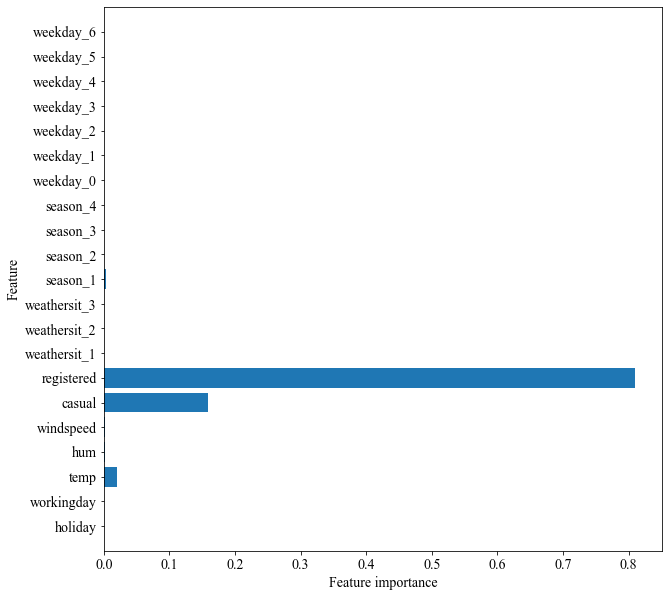

In [33]:
fig,ax=plt.subplots(figsize=(10,10))

def plot_feature_importances_rf(model):
    n_features = len(X_mod.columns)
    plt.barh(range(n_features), rf.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_mod.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_rf(rf.fit(X_train,y_train))

# Gradient boosting 

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
from numpy import arange
estimators_list=[]
Training_RMSE_gb=[]
Testing_RMSE_gb=[]
for estimator in range(1,202,10):
        estimators_list.append(estimator)
        print("number of estimator: ",estimator)
        gb=GradientBoostingRegressor(n_estimators=estimator,random_state=12)
        gb.fit(X_train,y_train)
        y_train_predicted_gb=gb.predict(X_train)
        y_test_predicted_gb=gb.predict(X_test)
        
        #training
        error_train_gb = sqrt(mean_squared_error(y_train,y_train_predicted_gb))
        print("Training RMSE for GB regression:",error_train_gb)
        Training_RMSE_gb.append(error_train_gb)

        
        #testing 
        error_test_gb = sqrt(mean_squared_error(y_test,y_test_predicted_gb))
        print("Testing RMSE for GB regression:",error_test_gb)
        Testing_RMSE_gb.append(error_test_gb)

number of estimator:  1
Training RMSE for GB regression: 1596.6546842403513
Testing RMSE for GB regression: 1692.7934823218075
number of estimator:  11
Training RMSE for GB regression: 649.1346990576986
Testing RMSE for GB regression: 736.8209520288634
number of estimator:  21
Training RMSE for GB regression: 285.3589077156118
Testing RMSE for GB regression: 367.38955658056926
number of estimator:  31
Training RMSE for GB regression: 148.78642663087695
Testing RMSE for GB regression: 235.4749444329429
number of estimator:  41
Training RMSE for GB regression: 101.78149240326213
Testing RMSE for GB regression: 186.83308103236632
number of estimator:  51
Training RMSE for GB regression: 81.57592568715334
Testing RMSE for GB regression: 167.8817389054794
number of estimator:  61
Training RMSE for GB regression: 71.10299722188866
Testing RMSE for GB regression: 161.7783856728654
number of estimator:  71
Training RMSE for GB regression: 63.627206322914915
Testing RMSE for GB regression: 156.

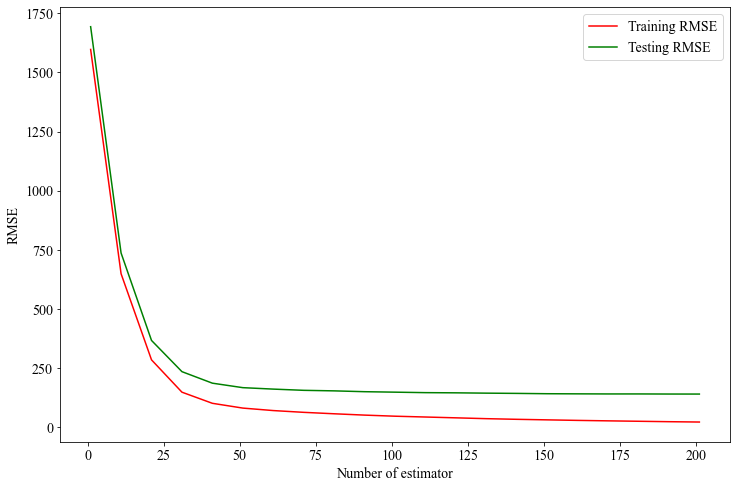

In [35]:
from matplotlib import rcParams
max_depth=range(1,202,10)
Training_RMSE_gb=np.array(Training_RMSE_gb)  
Testing_RMSE_gb=np.array(Testing_RMSE_gb) 
plt.figure(figsize=(12,8))
TA,=plt.plot(max_depth,Training_RMSE_gb,label="Training RMSE",color="red")
VA,=plt.plot(max_depth,Testing_RMSE_gb,label="Testing RMSE",color="green")
plt.legend([TA,VA],['Training RMSE','Testing RMSE'],fontsize=14)
plt.xlabel("Number of estimator")
plt.ylabel("RMSE")
rcParams['font.family'] = 'Times New Roman'
rcParams.update({'font.size': 14})
plt.show()

In [36]:
min_sample_split=[]
max_leaf_nodes=[]
max_depth=[]
Training_RMSE_gb=[]
Testing_RMSE_gb=[]
Train_minus_test_RMSE_gb=[]
for s in range(10,30,2):
    for l in range(100,1100,200):
        for d in range (10,30,2):
            print("Minimum sapmle for split:",s)
            min_sample_split.append(s)
            print("Maximum number of leaf in end modes:",l)
            max_leaf_nodes.append(l)
            print("Maximum depth:",d)
            max_depth.append(d)


            gb = GradientBoostingRegressor(n_estimators=201,random_state=12,
                                       max_depth = d, min_samples_split=s,max_leaf_nodes=l)
            gb.fit(X_train,y_train)

            y_training_pred_gb = gb.predict(X_train)

            #training
            error_train_gb = sqrt(mean_squared_error(y_train,y_training_pred_gb))
            print("training RMSE for gb regression:",error_train_gb)
            Training_RMSE_rf.append(error_train_gb)

            y_test_pred_gb = dt.predict(X_test)
            #testing 
            error_test_gb = sqrt(mean_squared_error(y_test,y_test_pred_gb))
            print("testing RMSE for gb regression:",error_test_gb)
            Testing_RMSE_gb.append(error_test_gb)

            #diff
            y_error_train_min_test_gb=error_train_gb-error_test_gb
            Train_minus_test_RMSE_gb.append(y_error_train_min_test_gb)
            print("Train_minus_test_RMSE",y_error_train_min_test_gb)
            print("")



Minimum sapmle for split: 10
Maximum number of leaf in end modes: 100
Maximum depth: 10
training RMSE for gb regression: 0.03424035150996156
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.05251425870364

Minimum sapmle for split: 10
Maximum number of leaf in end modes: 100
Maximum depth: 12
training RMSE for gb regression: 0.012964939539568168
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.073789670674

Minimum sapmle for split: 10
Maximum number of leaf in end modes: 100
Maximum depth: 14
training RMSE for gb regression: 0.002249735076192159
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.0845048751374

Minimum sapmle for split: 10
Maximum number of leaf in end modes: 100
Maximum depth: 16
training RMSE for gb regression: 0.002383325215321149
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.08437128499827

Minimum sapmle for split: 10
Maximum number of leaf in end modes

training RMSE for gb regression: 0.0010714175933147492
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.08568319262025

Minimum sapmle for split: 10
Maximum number of leaf in end modes: 700
Maximum depth: 22
training RMSE for gb regression: 0.0008585387587760728
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.0858960714548

Minimum sapmle for split: 10
Maximum number of leaf in end modes: 700
Maximum depth: 24
training RMSE for gb regression: 0.0008323840875247354
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.08592222612606

Minimum sapmle for split: 10
Maximum number of leaf in end modes: 700
Maximum depth: 26
training RMSE for gb regression: 0.0006820156666420772
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.0860725945469

Minimum sapmle for split: 10
Maximum number of leaf in end modes: 700
Maximum depth: 28
training RMSE for gb regression: 0.0005802966398918348
tes

training RMSE for gb regression: 0.11787700322835962
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -427.9688776069852

Minimum sapmle for split: 12
Maximum number of leaf in end modes: 500
Maximum depth: 12
training RMSE for gb regression: 0.0457401890906182
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.04101442112295

Minimum sapmle for split: 12
Maximum number of leaf in end modes: 500
Maximum depth: 14
training RMSE for gb regression: 0.012667354232678906
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.0740872559809

Minimum sapmle for split: 12
Maximum number of leaf in end modes: 500
Maximum depth: 16
training RMSE for gb regression: 0.015002565411464134
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.0717520448021

Minimum sapmle for split: 12
Maximum number of leaf in end modes: 500
Maximum depth: 18
training RMSE for gb regression: 0.007923986630691224
testing RMSE

training RMSE for gb regression: 0.009975623250598167
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.07677898696295

Minimum sapmle for split: 14
Maximum number of leaf in end modes: 100
Maximum depth: 24
training RMSE for gb regression: 0.009099925411207695
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.0776546848024

Minimum sapmle for split: 14
Maximum number of leaf in end modes: 100
Maximum depth: 26
training RMSE for gb regression: 0.007402556116366098
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.0793520540972

Minimum sapmle for split: 14
Maximum number of leaf in end modes: 100
Maximum depth: 28
training RMSE for gb regression: 0.010786083633324044
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.07596852658025

Minimum sapmle for split: 14
Maximum number of leaf in end modes: 300
Maximum depth: 10
training RMSE for gb regression: 0.23403396547391878
testing R

training RMSE for gb regression: 0.056924053804504327
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.0298305564091

Minimum sapmle for split: 14
Maximum number of leaf in end modes: 900
Maximum depth: 16
training RMSE for gb regression: 0.030417096847482908
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.0563375133661

Minimum sapmle for split: 14
Maximum number of leaf in end modes: 900
Maximum depth: 18
training RMSE for gb regression: 0.01777470530174101
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.0689799049118

Minimum sapmle for split: 14
Maximum number of leaf in end modes: 900
Maximum depth: 20
training RMSE for gb regression: 0.011231147883572372
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.07552346233

Minimum sapmle for split: 14
Maximum number of leaf in end modes: 900
Maximum depth: 22
training RMSE for gb regression: 0.009975623250598167
testing RMSE 

training RMSE for gb regression: 0.012679173743894342
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.0740754364697

Minimum sapmle for split: 16
Maximum number of leaf in end modes: 500
Maximum depth: 28
training RMSE for gb regression: 0.01289028967500215
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.0738643205386

Minimum sapmle for split: 16
Maximum number of leaf in end modes: 700
Maximum depth: 10
training RMSE for gb regression: 0.29953521706583314
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -427.7872193931477

Minimum sapmle for split: 16
Maximum number of leaf in end modes: 700
Maximum depth: 12
training RMSE for gb regression: 0.14489837354369955
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -427.9418562366699

Minimum sapmle for split: 16
Maximum number of leaf in end modes: 700
Maximum depth: 14
training RMSE for gb regression: 0.1206979721615872
testing RMSE fo

training RMSE for gb regression: 0.044395426940424
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.04235918327316

Minimum sapmle for split: 18
Maximum number of leaf in end modes: 300
Maximum depth: 20
training RMSE for gb regression: 0.03988882431381009
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.04686578589974

Minimum sapmle for split: 18
Maximum number of leaf in end modes: 300
Maximum depth: 22
training RMSE for gb regression: 0.030399007544604187
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.056355602669

Minimum sapmle for split: 18
Maximum number of leaf in end modes: 300
Maximum depth: 24
training RMSE for gb regression: 0.028912694463072607
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.0578419157505

Minimum sapmle for split: 18
Maximum number of leaf in end modes: 300
Maximum depth: 26
training RMSE for gb regression: 0.02869979686385399
testing RMSE f

training RMSE for gb regression: 0.6501998844363477
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -427.4365547257772

Minimum sapmle for split: 20
Maximum number of leaf in end modes: 100
Maximum depth: 12
training RMSE for gb regression: 0.4717109125622039
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -427.61504369765134

Minimum sapmle for split: 20
Maximum number of leaf in end modes: 100
Maximum depth: 14
training RMSE for gb regression: 0.18799586625155146
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -427.89875874396205

Minimum sapmle for split: 20
Maximum number of leaf in end modes: 100
Maximum depth: 16
training RMSE for gb regression: 0.1427575296936665
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -427.9439970805199

Minimum sapmle for split: 20
Maximum number of leaf in end modes: 100
Maximum depth: 18
training RMSE for gb regression: 0.11594882824827991
testing RMSE for

training RMSE for gb regression: 0.08168591901668469
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.00506869119687

Minimum sapmle for split: 20
Maximum number of leaf in end modes: 700
Maximum depth: 24
training RMSE for gb regression: 0.06004755601606424
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.0267070541975

Minimum sapmle for split: 20
Maximum number of leaf in end modes: 700
Maximum depth: 26
training RMSE for gb regression: 0.06134159784412387
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.0254130123694

Minimum sapmle for split: 20
Maximum number of leaf in end modes: 700
Maximum depth: 28
training RMSE for gb regression: 0.051636548824019766
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -428.03511806138954

Minimum sapmle for split: 20
Maximum number of leaf in end modes: 900
Maximum depth: 10
training RMSE for gb regression: 0.6501998844363477
testing RMSE 

training RMSE for gb regression: 0.39009330580412355
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -427.6966613044095

Minimum sapmle for split: 22
Maximum number of leaf in end modes: 500
Maximum depth: 16
training RMSE for gb regression: 0.2863287364624673
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -427.8004258737511

Minimum sapmle for split: 22
Maximum number of leaf in end modes: 500
Maximum depth: 18
training RMSE for gb regression: 0.17633050069686773
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -427.9104241095167

Minimum sapmle for split: 22
Maximum number of leaf in end modes: 500
Maximum depth: 20
training RMSE for gb regression: 0.13413419805506457
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -427.9526204121585

Minimum sapmle for split: 22
Maximum number of leaf in end modes: 500
Maximum depth: 22
training RMSE for gb regression: 0.1432916135305414
testing RMSE for 

training RMSE for gb regression: 0.1249083552095565
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -427.961846255004

Minimum sapmle for split: 24
Maximum number of leaf in end modes: 100
Maximum depth: 28
training RMSE for gb regression: 0.11923012044575
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -427.9675244897678

Minimum sapmle for split: 24
Maximum number of leaf in end modes: 300
Maximum depth: 10
training RMSE for gb regression: 1.3070102655167692
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -426.7797443446968

Minimum sapmle for split: 24
Maximum number of leaf in end modes: 300
Maximum depth: 12
training RMSE for gb regression: 0.7547337193304136
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -427.33202089088314

Minimum sapmle for split: 24
Maximum number of leaf in end modes: 300
Maximum depth: 14
training RMSE for gb regression: 0.5150977498174243
testing RMSE for gb re

training RMSE for gb regression: 0.23220070387000133
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -427.8545539063436

Minimum sapmle for split: 24
Maximum number of leaf in end modes: 900
Maximum depth: 20
training RMSE for gb regression: 0.1845870752569653
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -427.9021675349566

Minimum sapmle for split: 24
Maximum number of leaf in end modes: 900
Maximum depth: 22
training RMSE for gb regression: 0.16327733928058832
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -427.923477270933

Minimum sapmle for split: 24
Maximum number of leaf in end modes: 900
Maximum depth: 24
training RMSE for gb regression: 0.15870677552875564
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -427.92804783468483

Minimum sapmle for split: 24
Maximum number of leaf in end modes: 900
Maximum depth: 26
training RMSE for gb regression: 0.1249083552095565
testing RMSE for 

training RMSE for gb regression: 1.791622774023992
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -426.29513183618957

Minimum sapmle for split: 26
Maximum number of leaf in end modes: 700
Maximum depth: 12
training RMSE for gb regression: 0.948678719118211
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -427.13807589109535

Minimum sapmle for split: 26
Maximum number of leaf in end modes: 700
Maximum depth: 14
training RMSE for gb regression: 0.8032688437349949
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -427.2834857664786

Minimum sapmle for split: 26
Maximum number of leaf in end modes: 700
Maximum depth: 16
training RMSE for gb regression: 0.5176698379024963
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -427.5690847723111

Minimum sapmle for split: 26
Maximum number of leaf in end modes: 700
Maximum depth: 18
training RMSE for gb regression: 0.3022591967141605
testing RMSE for gb 

training RMSE for gb regression: 0.30709860550910634
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -427.77965600470446

Minimum sapmle for split: 28
Maximum number of leaf in end modes: 300
Maximum depth: 24
training RMSE for gb regression: 0.2750857255007843
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -427.8116688847128

Minimum sapmle for split: 28
Maximum number of leaf in end modes: 300
Maximum depth: 26
training RMSE for gb regression: 0.231003111022114
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -427.85575149919146

Minimum sapmle for split: 28
Maximum number of leaf in end modes: 300
Maximum depth: 28
training RMSE for gb regression: 0.23155325736871218
testing RMSE for gb regression: 428.0867546102136
Train_minus_test_RMSE -427.85520135284486

Minimum sapmle for split: 28
Maximum number of leaf in end modes: 500
Maximum depth: 10
training RMSE for gb regression: 2.153589614175207
testing RMSE for 

In [37]:

gb=GradientBoostingRegressor(n_estimators=201,random_state=12)
gb.fit(X_train,y_train)
y_train_predicted_gb=gb.predict(X_train)
y_test_predicted_gb=gb.predict(X_test)

#training
error_train_gb = sqrt(mean_squared_error(y_train,y_train_predicted_gb))
print("Training RMSE for GB regression:",error_train_gb)

#testing 
error_test_gb = sqrt(mean_squared_error(y_test,y_test_predicted_gb))
print("Testing RMSE for GB regression:",error_test_gb)

Training RMSE for GB regression: 22.67422990211683
Testing RMSE for GB regression: 140.8286229656724


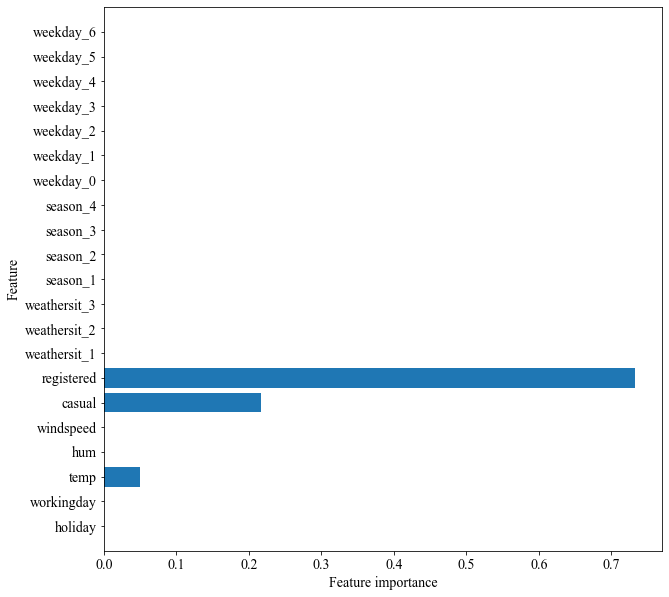

In [38]:
fig,ax=plt.subplots(figsize=(10,10))

def plot_feature_importances_gb(model):
    n_features = len(X_mod.columns)
    plt.barh(range(n_features), gb.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_mod.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_gb(gb.fit(X_train,y_train))

# 4(c)

# Accuracy comparison for three models

In [39]:
train_accuracy_3model=[error_train_dt,error_train_rf,error_train_gb]

In [40]:
test_accuracy_3model=[error_test_dt,error_test_rf,error_test_gb]

In [41]:
horz_axis=["Decision tree", "Random forest", "Gradient boosting"]

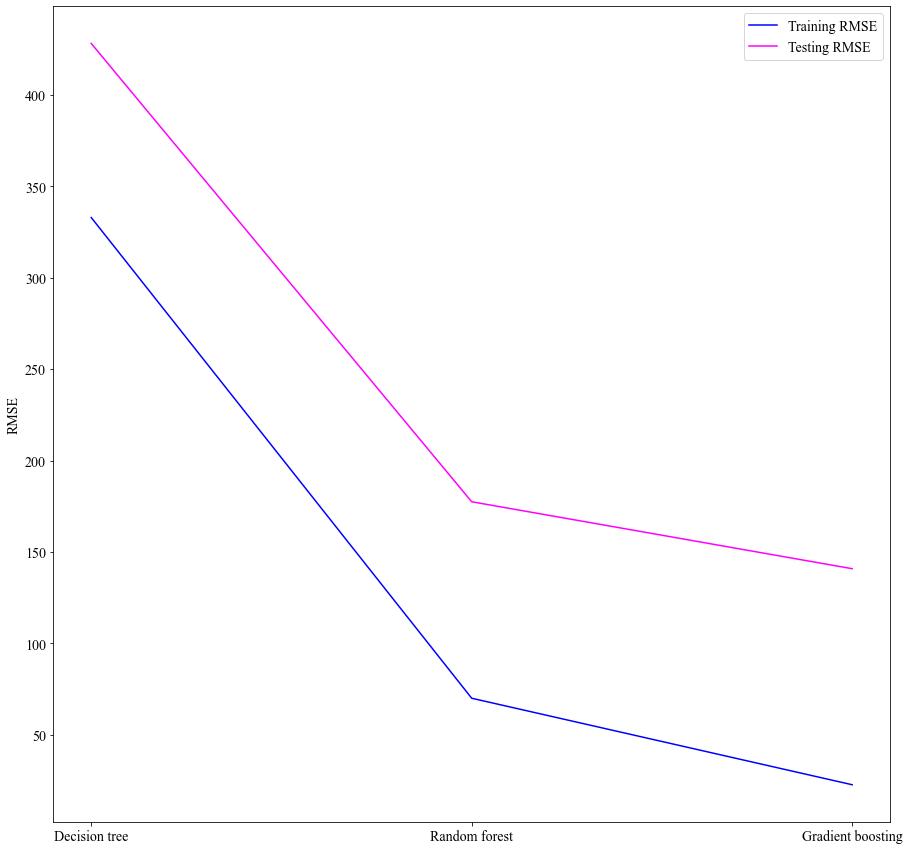

In [42]:
plt.figure(figsize=(15,15))
TrainA,=plt.plot(horz_axis,train_accuracy_3model,color="blue")
TestA,=plt.plot(horz_axis,test_accuracy_3model,color="magenta")
plt.legend([TrainA,TestA],['Training RMSE','Testing RMSE'],fontsize=14)
plt.ylabel("RMSE")
rcParams['font.family'] = 'Times New Roman'
rcParams.update({'font.size': 14})
plt.show()


# 4(d)

# Detection for any specific event

In [43]:
y_test_li=y_test.tolist()
y_test_pred_dt_li=y_test_pred_dt.tolist()
X_test_ind_list=X_test.index.tolist()

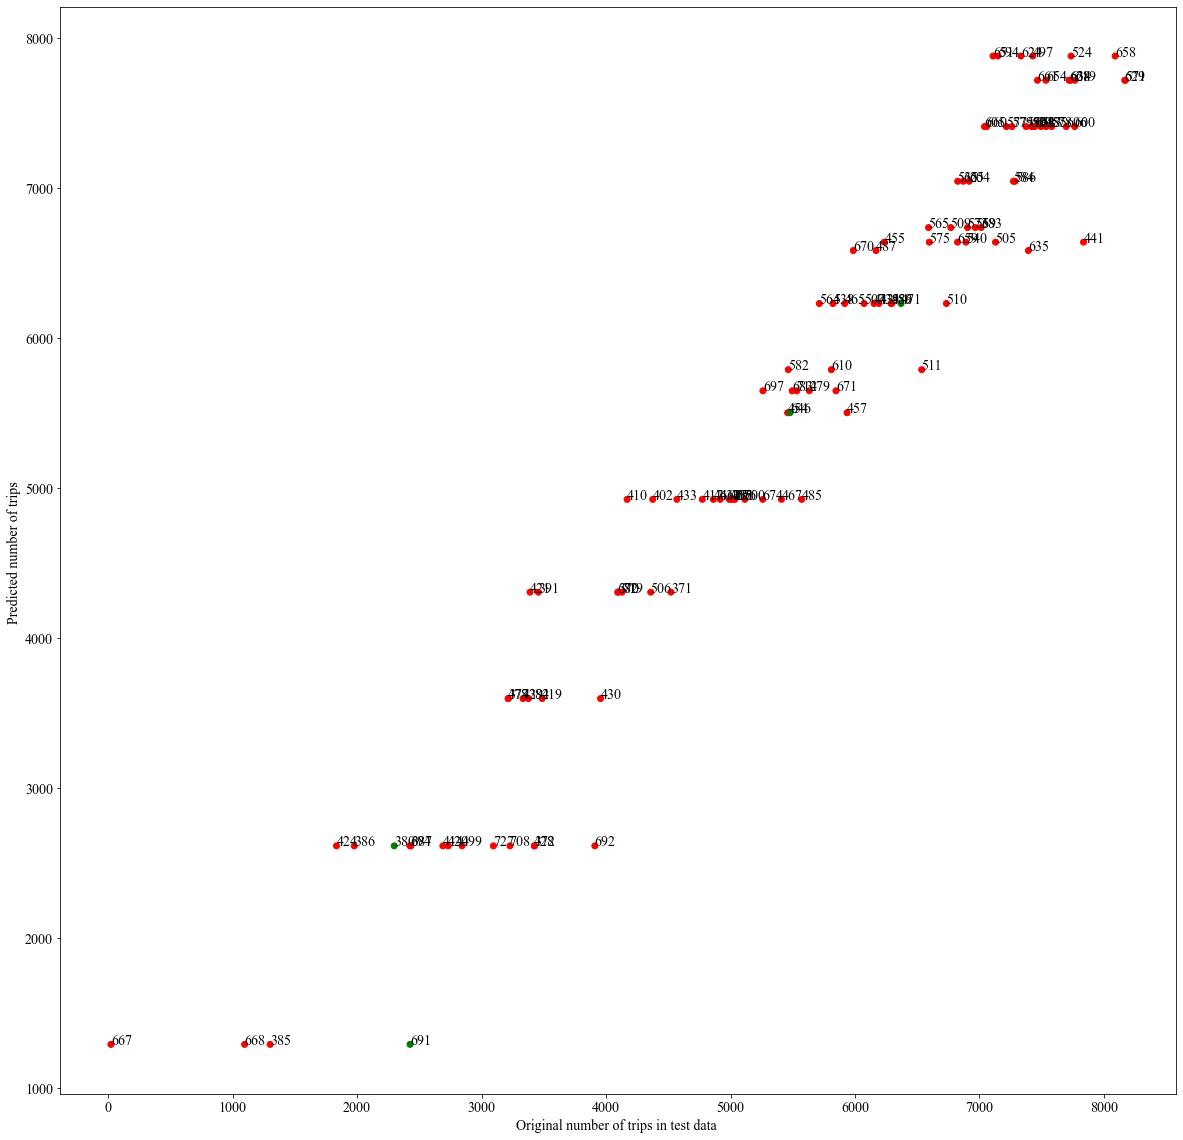

In [44]:

l=X_test['holiday'].values
l_list=l.tolist()
color= ['red' if l == 0 else 'green' for l in l_list ]
fig, ax = plt.subplots(1,1,figsize=(20,20))
ax.scatter(y_test,y_test_pred_dt,c=color)
plt.xlabel("Original number of trips in test data ")
plt.ylabel("Predicted number of trips ")
for i, txt in enumerate(X_test_ind_list):
     ax.annotate(txt, (y_test_li[i],y_test_pred_dt_li[i]))
plt.show()

In [45]:
print(df_2012.loc[df_2012.index==691])

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
691      692  2012-11-22       4   1    11        1        4           0   

     weathersit  temp     atemp       hum  windspeed  casual  registered   cnt  
691           1  0.34  0.350371  0.580417   0.052871     955        1470  2425  


In [46]:
print(df_2012.loc[df_2012.index==380])

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
380      381  2012-01-16       1   1     1        1        1           0   

     weathersit  temp     atemp     hum  windspeed  casual  registered   cnt  
380           1  0.19  0.190663  0.5225   0.231358     217        2081  2298  


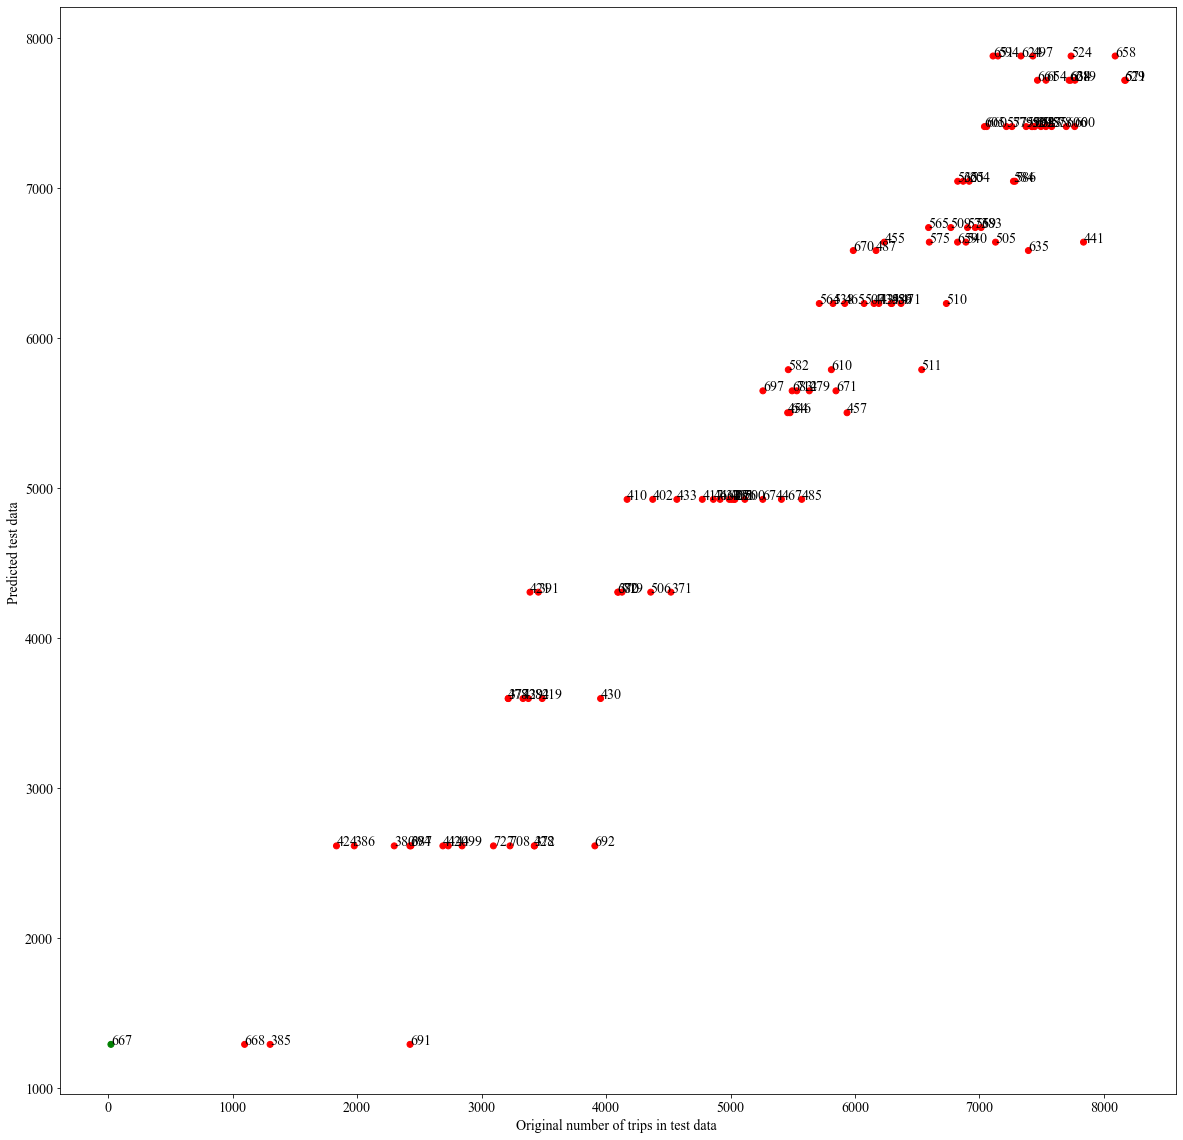

In [48]:

l=X_test['weathersit_3'].values
l_list=l.tolist()
color= ['red' if l == 0 else 'green' for l in l_list ]
fig, ax = plt.subplots(1,1,figsize=(20,20))
ax.scatter(y_test,y_test_pred_dt,c=color)
plt.xlabel("Original number of trips in test data ")
plt.ylabel("Predicted test data ")
for i, txt in enumerate(X_test_ind_list):
     ax.annotate(txt, (y_test_li[i],y_test_pred_dt_li[i]))
plt.show()

In [49]:
print(df_2012.loc[df_2012.index==667])

print(y_test.loc[667])

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
667      668  2012-10-29       4   1    10        0        1           1   

     weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
667           3  0.44  0.4394  0.88     0.3582       2          20   22  
22


In [50]:
df_2012.query('mnth == 10')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
639,640,2012-10-01,4,1,10,0,1,1,2,0.520833,0.512000,0.649167,0.090804,763,6015,6778
640,641,2012-10-02,4,1,10,0,2,1,3,0.590833,0.542333,0.871667,0.104475,315,4324,4639
641,642,2012-10-03,4,1,10,0,3,1,2,0.657500,0.599133,0.793750,0.066546,728,6844,7572
642,643,2012-10-04,4,1,10,0,4,1,2,0.657500,0.607975,0.722917,0.117546,891,6437,7328
643,644,2012-10-05,4,1,10,0,5,1,1,0.615000,0.580187,0.627500,0.106350,1516,6640,8156
644,645,2012-10-06,4,1,10,0,6,0,1,0.554167,0.538521,0.664167,0.268025,3031,4934,7965
645,646,2012-10-07,4,1,10,0,0,0,2,0.415833,0.419813,0.708333,0.141162,781,2729,3510
646,647,2012-10-08,4,1,10,1,1,0,2,0.383333,0.387608,0.709583,0.189679,874,4604,5478
647,648,2012-10-09,4,1,10,0,2,1,2,0.446667,0.438112,0.761667,0.190300,601,5791,6392
648,649,2012-10-10,4,1,10,0,3,1,1,0.514167,0.503142,0.630833,0.187821,780,6911,7691
